<a href="https://colab.research.google.com/github/Mohammadhsiavash/DeepL-Training/blob/main/Computer%20Vision/OCR_for_Handwritten_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Extract readable text from images of handwritten notes using a deep learning-based
OCR system.

In [ ]:
!pip install easyocr opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 30.4 MB/s eta 0:00:00


Load the Handwritten Image

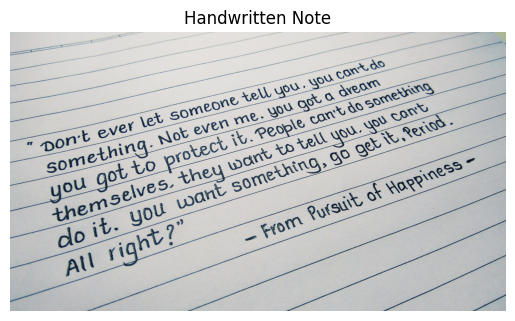

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

# Load and display the image
image_path = "https://i.redd.it/s54w837jbox11.jpg"

# Download the image from the URL
with urllib.request.urlopen(image_path) as url:
    img_array = np.array(bytearray(url.read()), dtype=np.uint8)
    img = cv2.imdecode(img_array, -1)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Handwritten Note")
plt.axis('off')
plt.show()

 Initialize OCR Reader

In [ ]:
import easyocr
# Initialize EasyOCR with English support
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Perform OCR on the Handwritten Note

In [ ]:
# Run OCR
results = reader.readtext(gray)
# Print extracted text
for bbox, text, confidence in results:
  print(f"Detected Text: '{text}' with confidence {confidence:.2f}")

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Detected Text: '0' with confidence 0.99
Detected Text: 'd0' with confidence 0.23
Detected Text: 'Ii' with confidence 0.07
Detected Text: 'i' with confidence 0.58
Detected Text: 'to' with confidence 0.90
Detected Text: '5' with confidence 0.75
Detected Text: 'ot' with confidence 0.31
Detected Text: 'cantdo' with confidence 1.00
Detected Text: 'you' with confidence 0.59
Detected Text: 'dream' with confidence 1.00
Detected Text: 'something' with confidence 0.96
Detected Text: 'You ,' with confidence 0.85
Detected Text: 'tell' with confidence 1.00
Detected Text: 'got' with confidence 0.93
Detected Text: 'someone' with confidence 1.00
Detected Text: 'cant' with confidence 1.00
Detected Text: 'you' with confidence 0.44
Detected Text: 'can't' with confidence 0.97
Detected Text: 'me.' with confidence 0.92
Detected Text: 'let' with confidence 1.00
Detected Text: 'Period' with confidence 0.92
Detected Text: 'You' with confidence 0.73
Detected Text: 'even' with confidence 0.77
Detected Text: 'Peo

Annotate Image with Detected Text

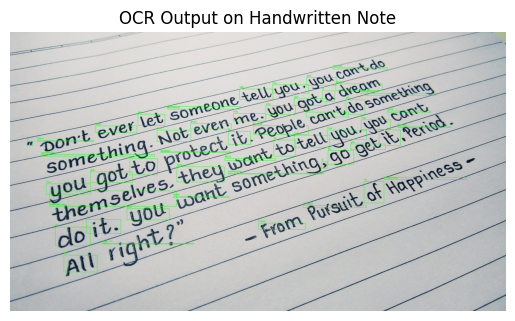

In [ ]:
# Draw boxes and text on image
for (bbox, text, confidence) in results:
  (top_left, top_right, bottom_right, bottom_left) = bbox
  top_left = tuple(map(int, top_left))
  bottom_right = tuple(map(int, bottom_right))
  cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)
  cv2.putText(img, text, (top_left[0], top_left[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
# Display annotated image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("OCR Output on Handwritten Note")
plt.axis('off')
plt.show()